In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
data = load_breast_cancer()


In [3]:
df = pd.DataFrame(data = data.data,columns = data.feature_names)
x = pd.DataFrame(data=data.target,columns = ["Result"])
df = df.join(x)
df.shape

(569, 31)

In [4]:
train, test = train_test_split(df, test_size=0.2)

In [5]:
train_x = train["Result"]
test_x = test["Result"]

In [6]:
del train["Result"]

In [7]:
del test["Result"]

In [8]:

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(train)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDF = principalDf.join(train_x)

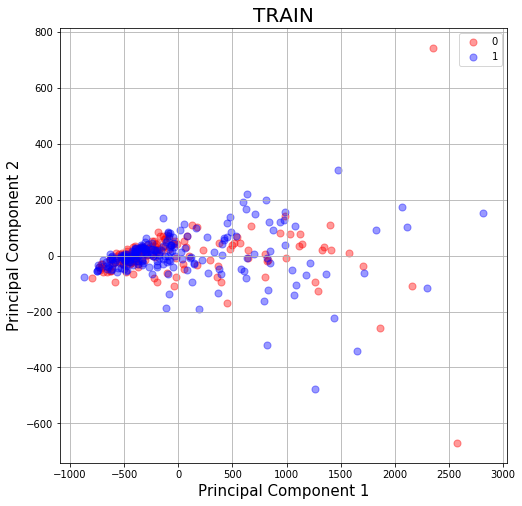

In [9]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('TRAIN', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDF['Result'] == target
    ax.scatter(finalDF.loc[indicesToKeep, 'principal component 1']
               , finalDF.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50
              , alpha = 0.4)
ax.legend(targets)
ax.grid()


In [10]:
pca_test = PCA(n_components=2)
principalComponents_test = pca_test.fit_transform(train)
principalDf_test = pd.DataFrame(data = principalComponents_test
             , columns = ['principal component 1', 'principal component 2'])

finalDF_test = principalDf_test.join(test_x)

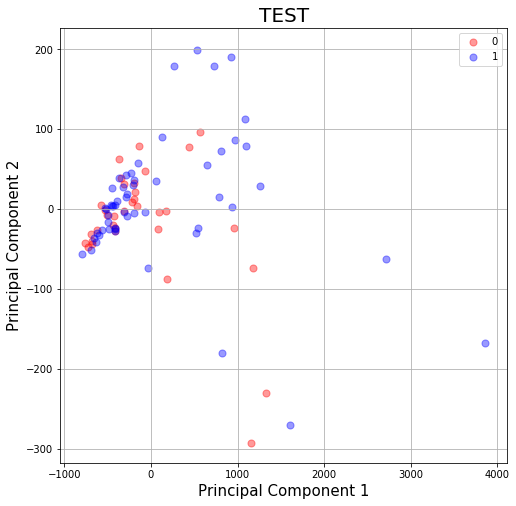

In [11]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('TEST', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDF_test['Result'] == target
    ax.scatter(finalDF_test.loc[indicesToKeep, 'principal component 1']
               , finalDF_test.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50
              , alpha = 0.4)
ax.legend(targets)
ax.grid()